In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

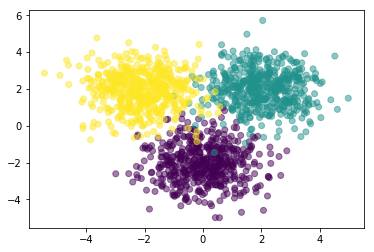

In [9]:
# Creating random training data
Nclass = 500
D = 2 # features
M = 3 # hidden nodes
K = 3 # target classes

# Making the data
# Gaussian cloud of D dimensions with Nclass number of points, centered at (0, -2)
X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3]).astype(np.float32)
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass) # Target label

# Visualizing
# X cordinate is X with all rows and 0th columns, Y coordinate is X with all rows of first col
# c is the parameter to classify them into different color
plt.scatter(X[:,0], X[:,1], c=Y, alpha=0.5)
plt.show()

In [10]:
N = len(Y)
# Turning Y (target labels) into indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1
T # This is the indicator matrix

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

Tensorflow has its own kinds of variables
We need to have a function to ini the weights and will return a tf variable

In [20]:
def init_weights(shape):
    return tf.Variable(tf.random.normal(shape, stddev=0.01)) # init weights as random first

# Defining the forward direction
def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    return tf.matmul(Z, W2) + b2

# Now create tensorflow placeholders
# These represent your x and y data
tfX = tf.placeholder(tf.float32, [None, D]) # type float32 and the shape is (None x D)
tfY = tf.placeholder(tf.float32, [None, K])

# Now create the weights
W1 = init_weights([D, M])
b1 = init_weights([M])
W2 = init_weights([M, K])
b2 = init_weights([K])

# Get the output variable
# Note: this has no value yet
logits = forward(tfX, W1, b1, W2, b2)

# Defining the cost function
# TF will calculate the gradients and do gradDesc automatically
# No need to manually calculate the derivatives
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=tfY, logits=logits)) # v1 is deprecated

# Creating a training function
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # 0.05 is learning rate
predict_op = tf.argmax(logits, axis=1) # 1 = axis

# In tf, you have to create a session
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
    pred = sess.run(predict_op, feed_dict={tfX: X, tfY: T})
    if i % 100 == 0:
        print("Accuracy = ", np.mean(Y==pred))

Accuracy =  0.3333333333333333
Accuracy =  0.632
Accuracy =  0.6573333333333333
Accuracy =  0.7366666666666667
Accuracy =  0.894
Accuracy =  0.962
Accuracy =  0.968
Accuracy =  0.968
Accuracy =  0.9693333333333334
Accuracy =  0.9706666666666667
